<a href="https://colab.research.google.com/github/anujott-codes/heart-disease-prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing all important libraries

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

##Loading the dataset into dataframe

In [198]:
#loading the data
url = '/content/drive/MyDrive/Colab Notebooks/YT/Projects/Heart Disease Project/heart.csv'
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##Data Understanding and Analysis

In [199]:
#checking the columns
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [200]:
#shape
df.shape

(918, 12)

In [201]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [202]:
#checking null values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [203]:
#statistical info
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##EDA and DATA CLEANING

In [204]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

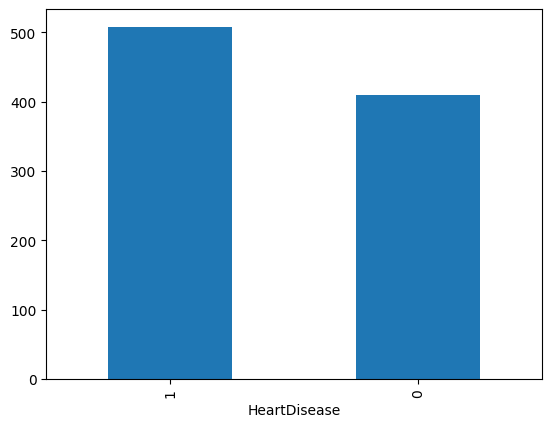

In [205]:
#checking value counts of HeartDisease column
df['HeartDisease'].value_counts().plot(kind='bar')

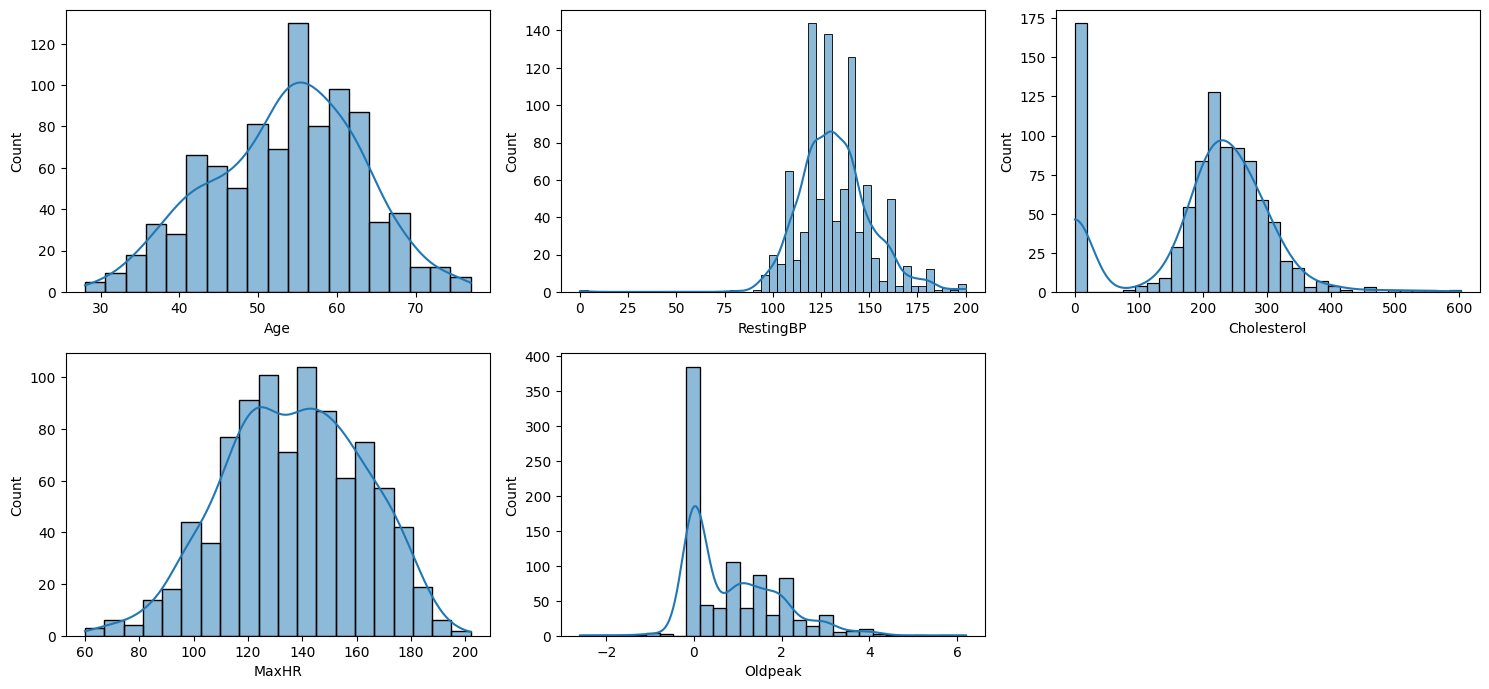

In [206]:
#function for distribution plotting
def plotting(var,num):
  plt.subplot(3,3,num)
  sns.histplot(data=df,x=var,kde=True)
  plt.tight_layout()

#selecting numerical columns
numerical_columns = df.select_dtypes(include='number').columns.tolist()
numerical_columns.remove('HeartDisease')
numerical_columns.remove('FastingBS')

#figure
plt.figure(figsize=(15, 10))

#plotting graphs
for i,col in enumerate(numerical_columns):
  plotting(col,i+1)

plt.show()

###It is not possible to have '0' restingBP and '0' Cholesterol level so the data is inconsistent

In [207]:
#imputing zero with mean cholestrol level of non zero records
ch_mean = df[df['Cholesterol']!=0]['Cholesterol'].mean()
ch_mean

df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [208]:
#imputing zero in resting bp with mean resting bp for non zero records
resting_bp_mean = df[df['RestingBP']!=0]['RestingBP'].mean()
resting_bp_mean

df['RestingBP'] = df['RestingBP'].replace(0,resting_bp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

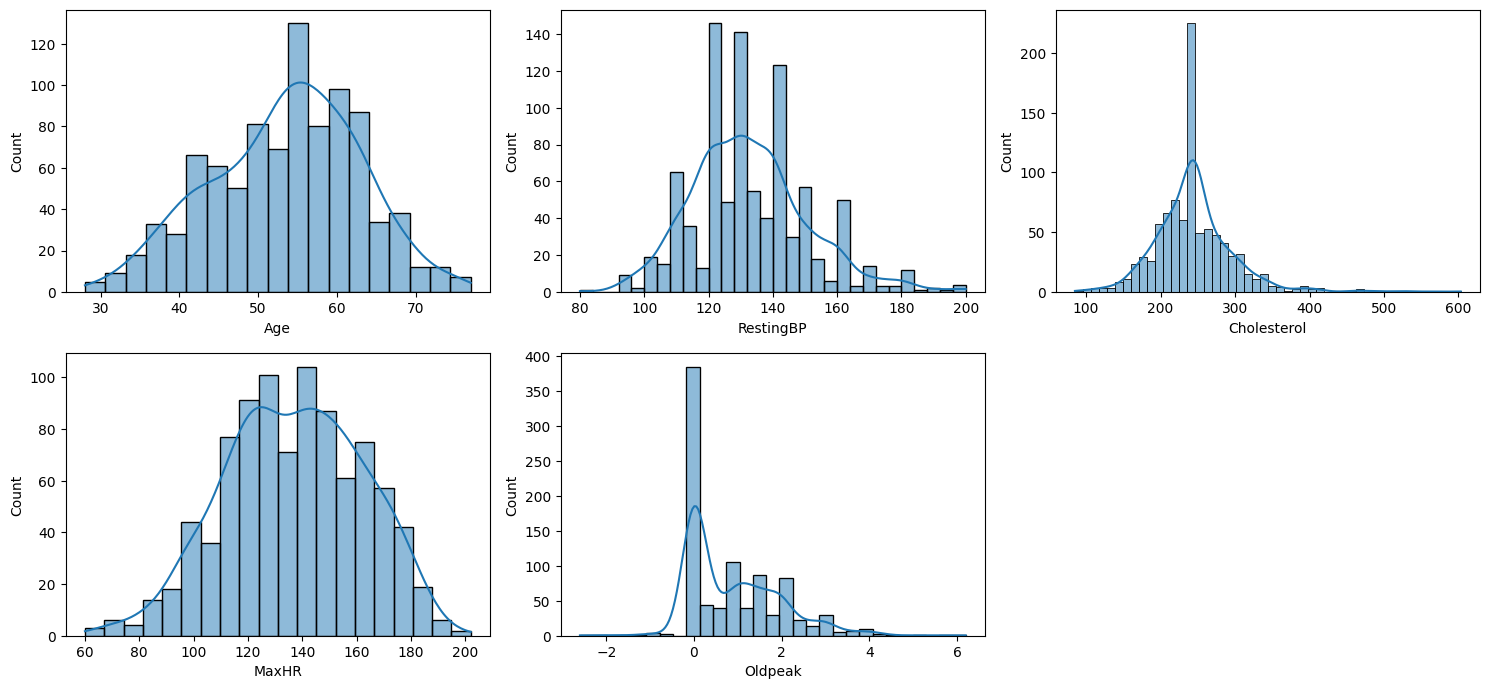

In [209]:
#rechecking distribution
#figure
plt.figure(figsize=(15, 10))

#plotting graphs
for i,col in enumerate(numerical_columns):
  plotting(col,i+1)

plt.show()

In [210]:
#checking Oldpeak column i.e not supposed to have negative values
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100.0,244.64,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100.0,244.64,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105.0,244.64,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110.0,244.64,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115.0,244.64,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100.0,244.64,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130.0,244.64,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120.0,244.64,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120.0,244.64,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115.0,244.64,1,Normal,72,Y,-0.5,Flat,1


In [211]:
#number of such rows
df[df['Oldpeak']<0].count()[0]

np.int64(13)

In [212]:
# Convert Oldpeak to absolute values since negatives are clinically invalid
df['Oldpeak'] = df['Oldpeak'].abs()

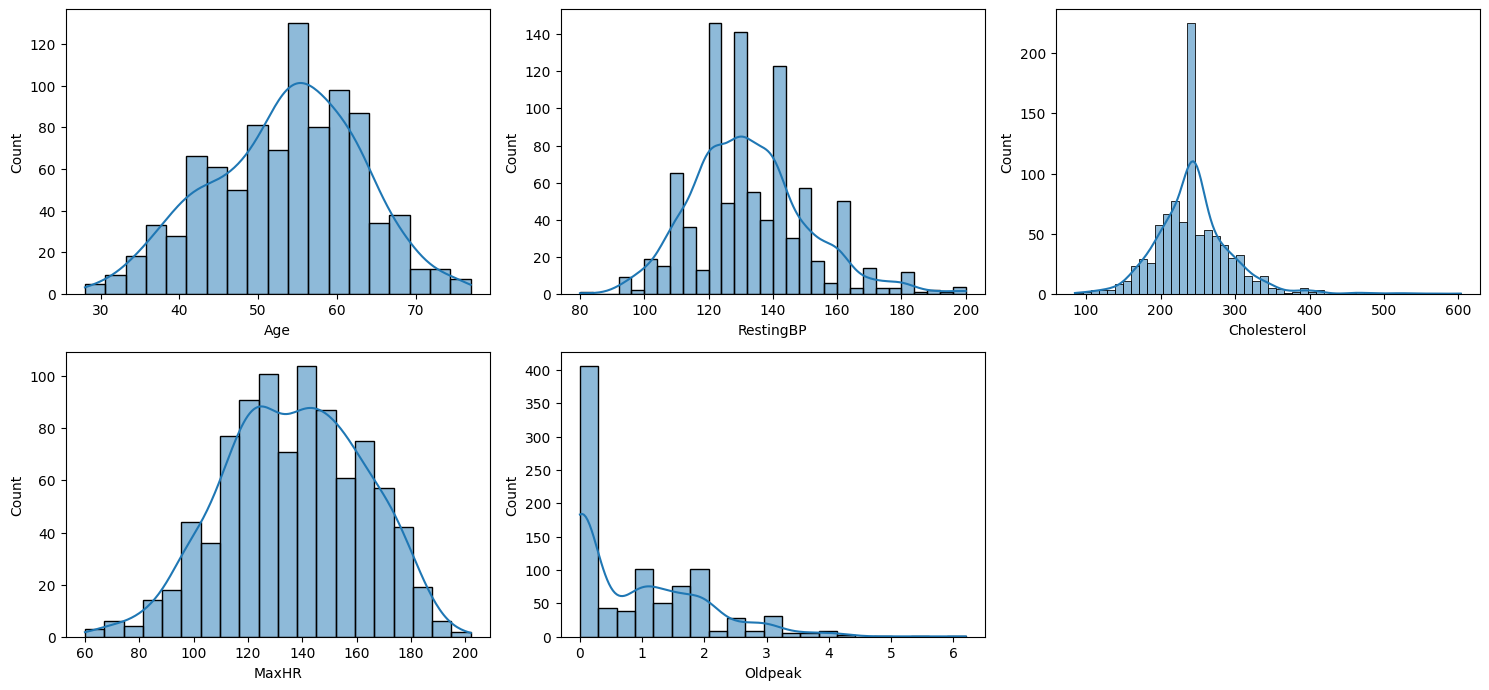

In [213]:
#rechecking distribution
#figure
plt.figure(figsize=(15, 10))

#plotting graphs
for i,col in enumerate(numerical_columns):
  plotting(col,i+1)

plt.show()

###Oldpeak is right skewed!

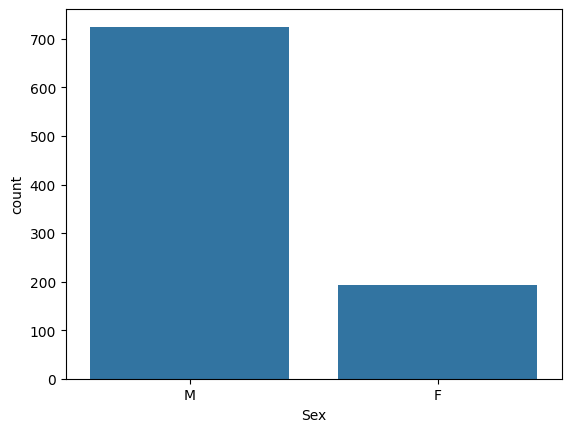

In [214]:
#checking imbalance in sex
sns.countplot(data=df,x = 'Sex')
plt.show()

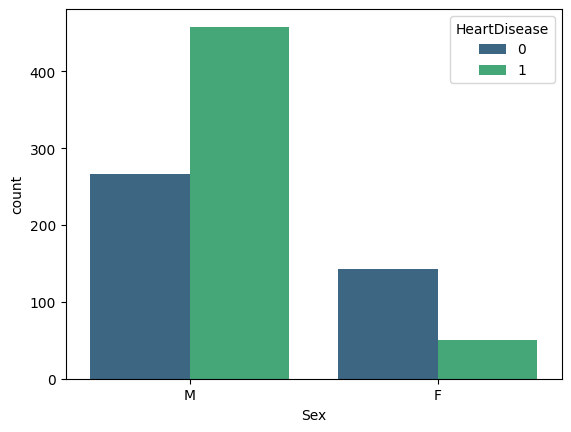

In [215]:
#checking for any pattern in HeartDisease
sns.countplot(data=df,x = 'Sex',palette = 'viridis',hue='HeartDisease')
plt.show()

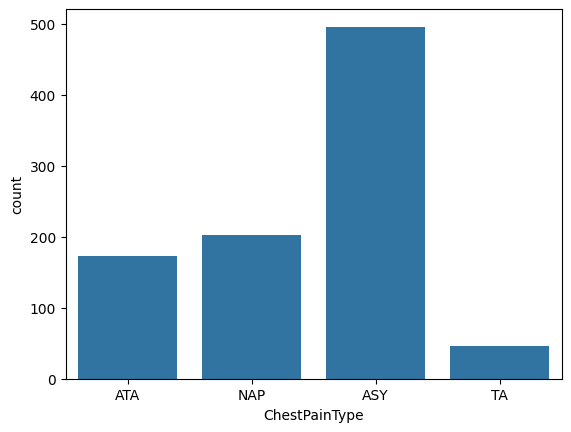

In [216]:
#chest pain
sns.countplot(data=df,x = 'ChestPainType')
plt.show()

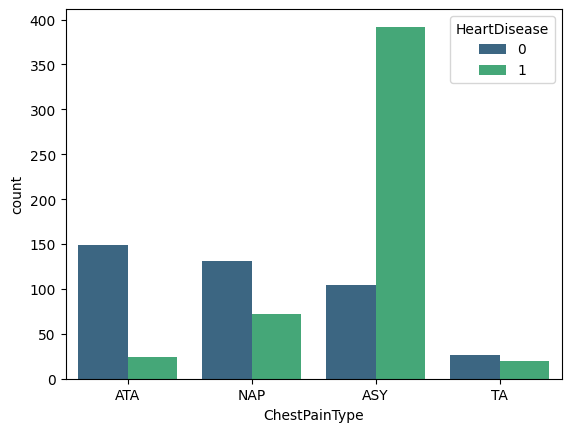

In [217]:
#pattern in chest pain
sns.countplot(data=df,x = 'ChestPainType',palette = 'viridis',hue='HeartDisease')
plt.show()

###ASY type is more prominent to have a heart disease

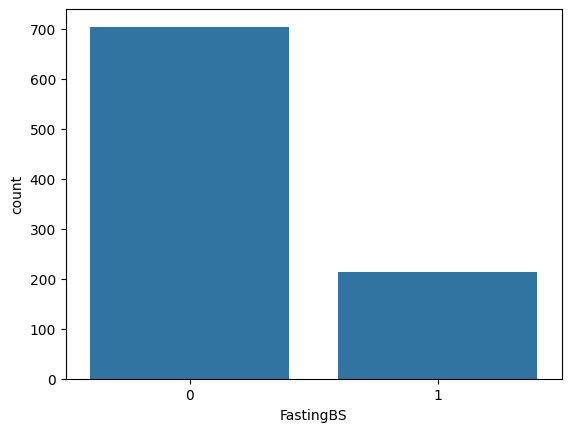

In [218]:
#FastingBS
sns.countplot(data=df,x = 'FastingBS')
plt.show()

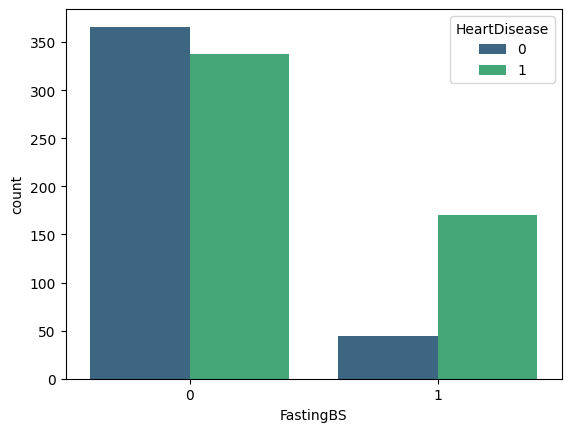

In [219]:
#checking for FastingBS
sns.countplot(data=df,x = 'FastingBS',palette = 'viridis',hue='HeartDisease')
plt.show()

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

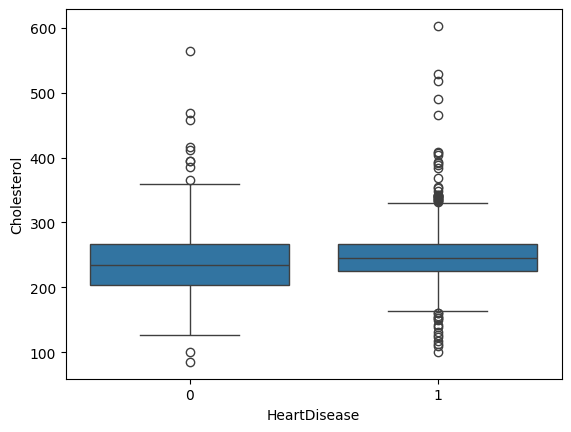

In [220]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol',data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

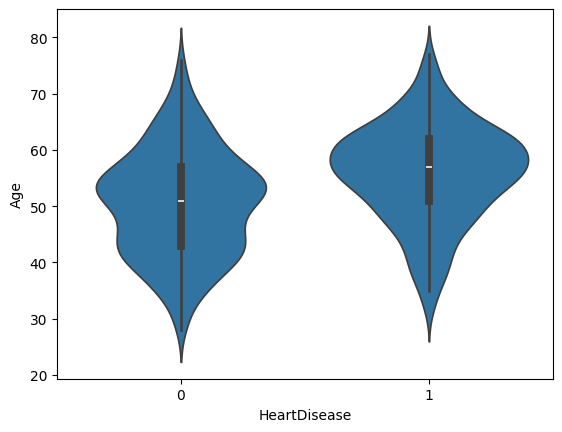

In [221]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

<Axes: >

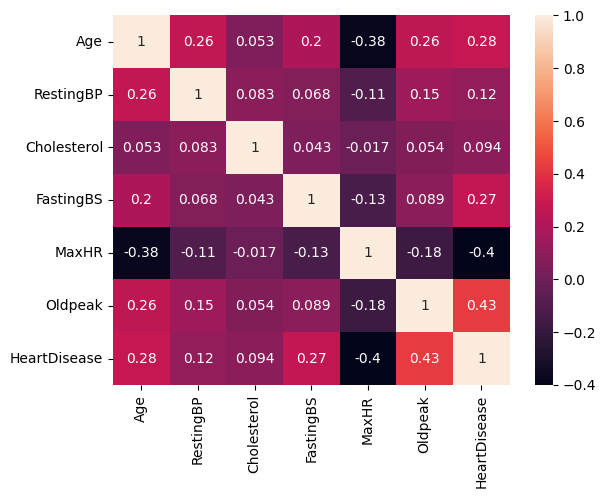

In [222]:
#checking correlation
sns.heatmap(df.corr(numeric_only=True), annot=True)

#Data PreProcessing

In [223]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [224]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded[['Sex_M',	'ChestPainType_ATA',	'ChestPainType_NAP',
           'ChestPainType_TA',	'RestingECG_Normal',	'RestingECG_ST',
           'ExerciseAngina_Y',	'ST_Slope_Flat',	'ST_Slope_Up']] = df_encoded[['Sex_M',	'ChestPainType_ATA',	'ChestPainType_NAP',
           'ChestPainType_TA',	'RestingECG_Normal',	'RestingECG_ST',
           'ExerciseAngina_Y',	'ST_Slope_Flat',	'ST_Slope_Up']].astype('int')
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130.0,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


#Data Split

In [225]:
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']

In [226]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [227]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,42,120.0,240.00,1,194,0.8,1,0,1,0,1,0,0,0,0
25,36,130.0,209.00,0,178,0.0,1,0,1,0,1,0,0,0,1
84,56,150.0,213.00,1,125,1.0,1,0,0,0,1,0,1,1,0
10,37,130.0,211.00,0,142,0.0,0,0,1,0,1,0,0,0,1
344,51,120.0,244.64,1,104,0.0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120.0,254.00,0,110,0.0,0,0,0,0,0,1,0,0,1
270,45,120.0,225.00,0,140,0.0,1,0,0,0,1,0,0,0,1
860,60,130.0,253.00,0,144,1.4,1,0,0,0,1,0,1,0,1
435,60,152.0,244.64,0,118,0.0,1,0,0,0,0,1,1,0,1


In [228]:
y_train

,HeartDisease
795,0
25,0
84,1
10,0
344,1
...,...
106,0
270,0
860,1
435,0


In [229]:
#data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#columns to scale
features_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled.loc[:, features_to_scale] = scaler.fit_transform(X_train.loc[:, features_to_scale])
X_test_scaled.loc[:, features_to_scale] = scaler.transform(X_test.loc[:, features_to_scale])

In [230]:
X_train_scaled

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
795,-1.245067,-0.745803,-0.105967,1.842609,2.284353,-0.122089,1,0,1,0,1,0,0,0,0
25,-1.886236,-0.182704,-0.720484,-0.542709,1.652241,-0.875936,1,0,1,0,1,0,0,0,1
84,0.250993,0.943496,-0.641192,1.842609,-0.441628,0.066372,1,0,0,0,1,0,1,1,0
10,-1.779375,-0.182704,-0.680838,-0.542709,0.229991,-0.875936,0,0,1,0,1,0,0,0,1
344,-0.283314,-0.745803,-0.013987,1.842609,-1.271274,-0.875936,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.603898,-0.745803,0.171557,-0.542709,-1.034232,-0.875936,0,0,0,0,0,1,0,0,1
270,-0.924483,-0.745803,-0.403314,-0.542709,0.150977,-0.875936,1,0,0,0,1,0,0,0,1
860,0.678439,-0.182704,0.151734,-0.542709,0.309005,0.443296,1,0,0,0,1,0,1,0,1
435,0.678439,1.056116,-0.013987,-0.542709,-0.718176,-0.875936,1,0,0,0,0,1,1,0,1


#Model Training

In [231]:
#importing models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
# Support Vector Machine Classifier
from sklearn.svm import SVC

In [232]:
#import evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    log_loss,
    average_precision_score
)

In [233]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}
result = []

In [234]:
best_model = None
best_f1 = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    result.append({
        'model': name,
        'accuracy': round(acc, 4),
        'f1_score': round(f1, 4),
        'precision': round(precision, 4),
        'recall': round(recall, 4),
    })


    if f1 > best_f1:
        best_f1 = f1
        best_model = model

# Display result summary
import pandas as pd
result_df = pd.DataFrame(result)
print(result_df)

# Final selected model
print("\nBest Model Based on F1 Score:")
print(best_model)


                    model  accuracy  f1_score  precision  recall
0     Logistic Regression    0.8696    0.8846     0.9109  0.8598
1             Naive Bayes    0.8478    0.8614     0.9158  0.8131
2           Decision Tree    0.7772    0.7980     0.8438  0.7570
3     K-Nearest Neighbors    0.8641    0.8826     0.8868  0.8785
4  Support Vector Machine    0.8424    0.8626     0.8750  0.8505

Best Model Based on F1 Score:
LogisticRegression()


In [238]:
import joblib
joblib.dump(models['Logistic Regression'], 'log_reg.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.to_list(),'columns.pkl')

['columns.pkl']